In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from network import Network, List
from adt import EgoTree


def render_egotrees(egotrees: List[EgoTree]):
    ind = 100
    for tree in egotrees:
        ind += 1
        Ge = nx.Graph()
        queue = [tree]
        while queue:
            ctree = queue.pop(0)
            root = ctree.root.label
            Ge.add_node(root, label=root)
            for leave in ctree.leaves:
                queue.append(leave)
                Ge.add_node(leave.root.label)
                Ge.add_edge(root, leave.root.label, w=leave.weight())
        colors = []
        for node in Ge:
            if node == tree.root.label:
                # sarga a gyoker szine, mivel nincs tree layout
                colors.append('yellow')
            else:
                colors.append('red')
        pos = nx.kamada_kawai_layout(Ge)
        plt.figure(ind)
        nx.draw(Ge, pos, node_color=colors)
        labels = nx.get_node_attributes(Ge, 'label')
        nx.draw_networkx_labels(Ge, pos, labels)
        weights = nx.get_edge_attributes(Ge, 'w')
        nx.draw_networkx_edge_labels(Ge, pos, weights)


demand_distribution = [[0, 3, 4, 1, 1, 1, 1],
                       [3, 0, 2, 0, 1, 0, 4],
                       [4, 2, 0, 2, 0, 0, 4],
                       [1, 0, 2, 0, 3, 0, 0],
                       [1, 1, 0, 3, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0, 3],
                       [1, 4, 4, 0, 0, 3, 0]]

g = Network(demand_distribution)
print(g)

# Itt adjuk meg, hogy mennyi legyen a Delta az egoree generalaskor
# None -> 12 * atlag fokszam
# x > 1 -> annyi fokszam
g.create_dan(2)

G = nx.Graph()
for i in range(len(demand_distribution)):
    G.add_node(i, label=str(i))

for i in range(len(demand_distribution)-1):
    for j in range(i + 1, len(demand_distribution)):
        if demand_distribution[i][j] > 0:
            G.add_edge(i, j, w=demand_distribution[i][j])





[T0-3-T1, T0-4-T2, T0-1-T3, T0-1-T4, T0-1-T5, T0-1-T6, T1-2-T2, T1-1-T4, T1-4-T6, T2-2-T3, T2-4-T6, T3-3-T4, T5-3-T6]
[(Vertex: T0, 6), (Vertex: T1, 4), (Vertex: T2, 4), (Vertex: T6, 4)]
[(Vertex: T5, 2), (Vertex: T3, 3), (Vertex: T4, 3)]
Vertex: T0 Vertex: T1 Helper: Vertex: T5
Vertex: T0 Vertex: T2 Helper: Vertex: T3
Vertex: T0 Vertex: T6 Helper: Vertex: T4
Vertex: T1 Vertex: T2 Helper: Vertex: T4
Vertex: T1 Vertex: T6 Helper: Vertex: T3
Vertex: T2 Vertex: T6 Helper: Vertex: T5
[0, 3, 4, 1, 1, 1, 1]
[3, 0, 2, 0, 1, 0, 4]
[4, 2, 0, 2, 0, 0, 4]
[1, 0, 2, 0, 3, 0, 0]
[1, 1, 0, 3, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 3]
[1, 4, 4, 0, 0, 3, 0]
T0 L: [T2 L: [T4 L: [], T6 L: []], T1 L: [T3 L: [], T5 L: []]]
T1 L: [T6 L: [T4 L: []], T0 L: [T2 L: []]]
T2 L: [T0 L: [T1 L: []], T6 L: [T3 L: []]]
T6 L: [T1 L: [T5 L: []], T2 L: [T0 L: []]]
---- EGO TREES BEFORE ----
T0 L: [T2 L: [T4 L: [], T6 L: []], T1 L: [T3 L: [], T5 L: []]]
T1 L: [T6 L: [T4 L: []], T0 L: [T2 L: []]]
T2 L: [T0 L: [T1 L: []], T6 L: [T3 L

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{(0, 3): Text(0.04951559945049633, 0.21694191097510088, '7'),
 (0, 5): Text(0.3887395120840538, -0.48746393014369865, '4'),
 (1, 3): Text(-0.1387394971828929, 0.6078576524464321, '4'),
 (1, 5): Text(0.20048441545066453, -0.09654818867236742, '6'),
 (2, 5): Text(-0.2225209460295708, 8.514949079163614e-09, '10'),
 (2, 4): Text(-0.5617448586631283, 0.2705220745157666, '2'),
 (3, 4): Text(-0.9009688010990073, 3.8317270661947234e-08, '5'),
 (3, 5): Text(-0.5617448884654499, -0.27052202768354683, '13'),
 (3, 6): Text(-0.1387395567875362, -0.1739738901008736, '11'),
 (4, 5): Text(-0.5617448884654499, -0.7044058028015289, '3'),
 (4, 6): Text(-0.1387395567875362, -0.6078576652188556, '1')}

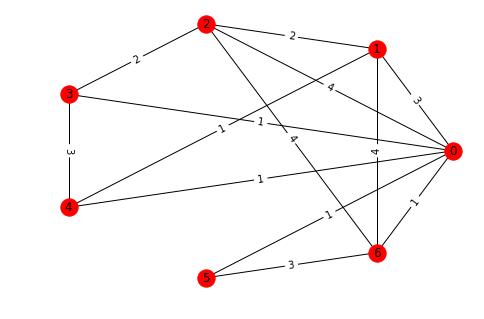

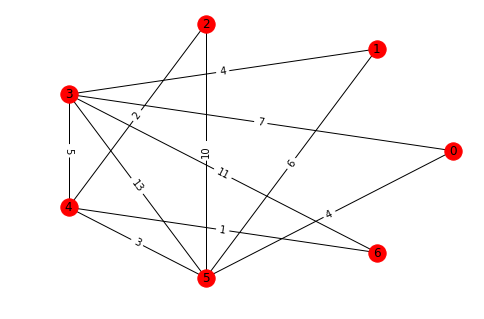

In [3]:
pos = nx.circular_layout(G)
plt.figure(200)
nx.draw(G, pos)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels)
weights = nx.get_edge_attributes(G, 'w')
nx.draw_networkx_edge_labels(G, pos, weights)


Gn = nx.Graph()
for i in range(len(demand_distribution)):
    Gn.add_node(i, label=str(i))

for edge in g.routing_scheme:
    Gn.add_edge(edge.v1.index, edge.v2.index, w=edge.probability)

pos = nx.circular_layout(Gn)
plt.figure(300)

nx.draw(Gn, pos, with_labels=False)
labels = nx.get_node_attributes(Gn, 'label')
nx.draw_networkx_labels(Gn, pos, labels)
weights = nx.get_edge_attributes(Gn, 'w')
nx.draw_networkx_edge_labels(Gn, pos, weights)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


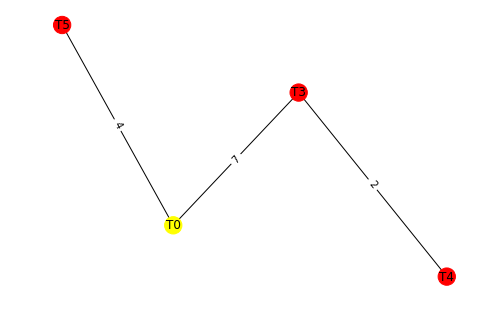

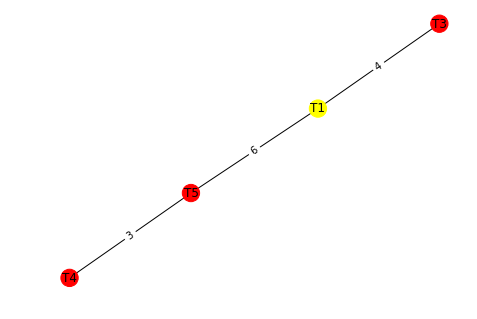

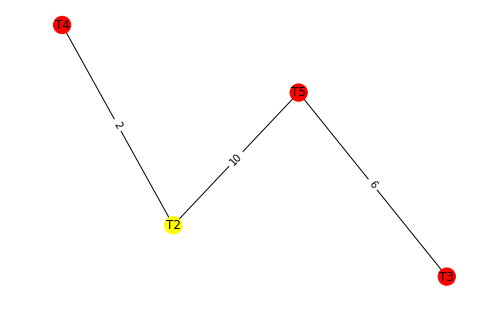

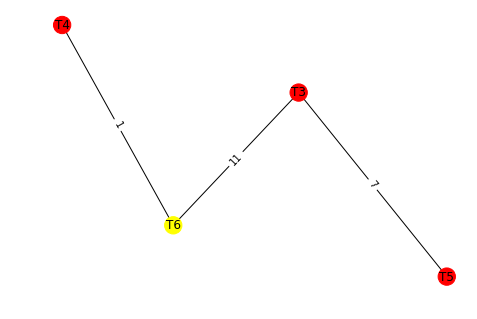

In [4]:
render_egotrees(g.egotrees)

plt.show()
